# Lead scoring case study

In [108]:
#importing important libraries

import numpy as np
import pandas as pd
# visulaisation
from matplotlib.pyplot import xticks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Warnings
import warnings
warnings.filterwarnings('ignore')
# To Scale our data
from sklearn.preprocessing import scale
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [109]:
#importing data
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [110]:
#checking shape
data.shape

(9240, 37)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [112]:
#Describing the data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### EXPLORATORY DATA ANALYSIS


In [113]:
# Checking dupilicates
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [114]:
sum(data.duplicated(subset = 'Lead Number')) == 0

True

In [115]:
#dropping Lead Number and Prospect ID 

data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [116]:
#Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)

In [117]:
#checking null values

data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [118]:
#checking percentage of null values

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [119]:
#dropping cols with more than 45% missing values

columns=data.columns

for i in columns:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [120]:
# Checking the null value percntage 

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [121]:
#Categorical Attributes Analysis:
# Count the country columns 

data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Belgium                    2
Netherlands                2
China                      2
Bangladesh                 2
Ghana                      2
Italy                      2
Denmark                    1
Malaysia                   1
Russia                     1
Indonesia                  1
Switzerland                1
Vietnam       

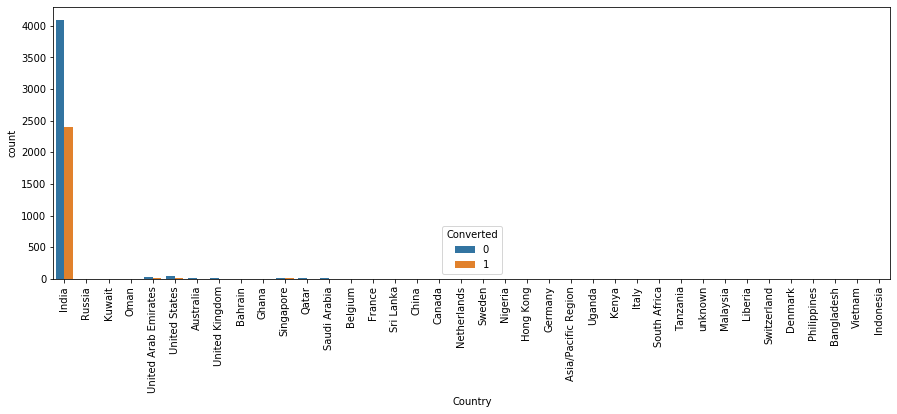

In [122]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(data.Country, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 - since india is the most in occurence ,we can impute all missing values with India. 

In [123]:
#Imputing all missing values with India

data['Country'] = data['Country'].replace(np.nan,'India')

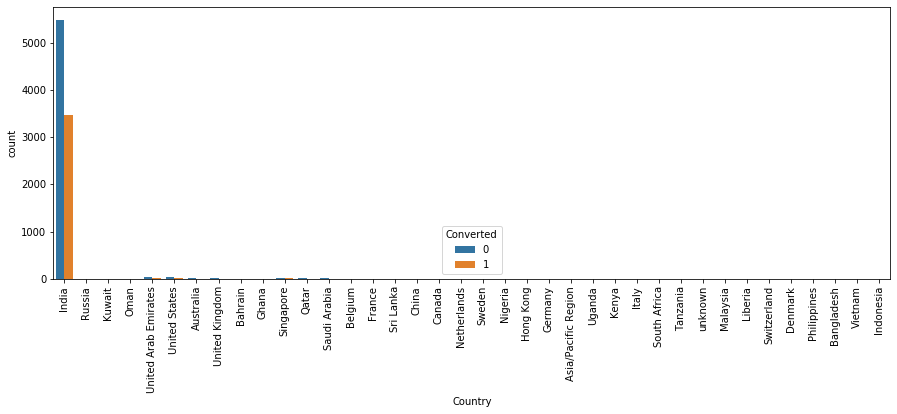

In [124]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Country, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

 - we can see the value of India is very high as compared to othes. 

In [125]:
#creating a list of columns to be droppped

columns_to_drop=['Country']

In [126]:
#checking value counts of "City" column

data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [127]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

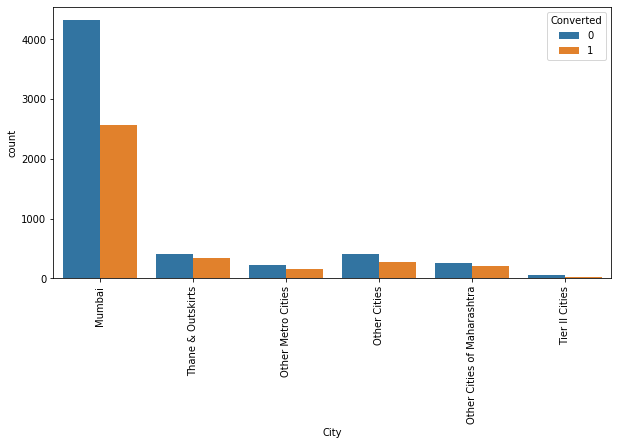

In [128]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(data.City, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [129]:
#checking value counts of Specialization column

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- NaN values could be the students with no specialisation , we could replace NaN values with 'not speciafied' 

In [130]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

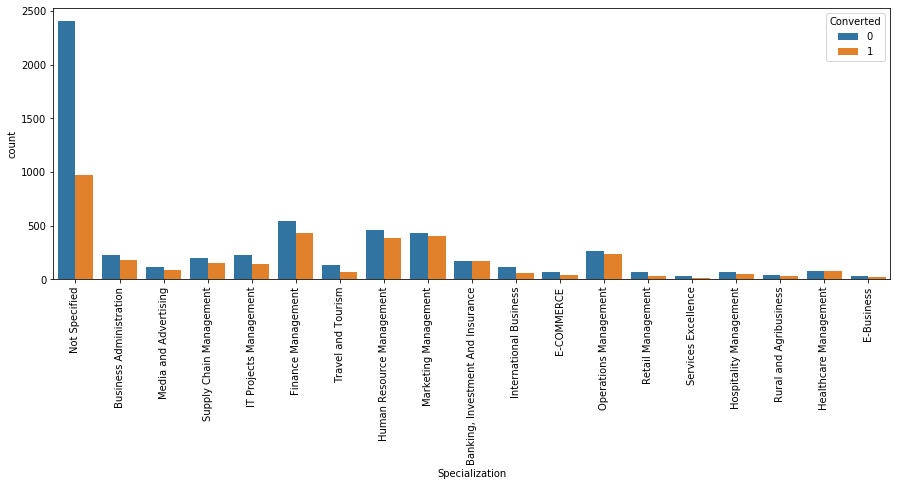

In [131]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- specialization with Management in them have higher number of data as well as data converted. So this is definitely a significant variable and should not be dropped

In [132]:
#combining Specializations 

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

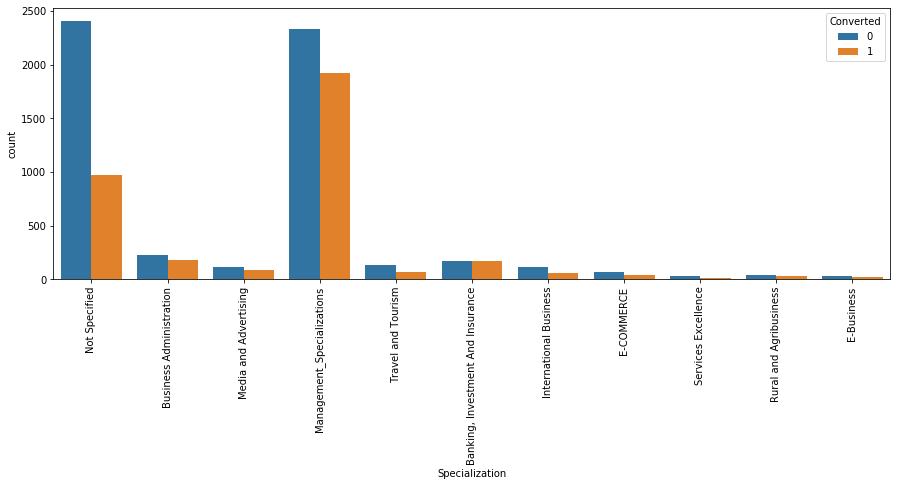

In [133]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [134]:
#Checking th count of values

data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

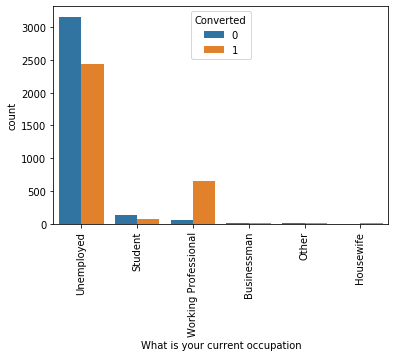

In [135]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data['What is your current occupation'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- we see that Working Professionals going for the course have high chances of joining it
 and Unemployed leads are the most in terms of Absolute numbers.

In [136]:
#checking value counts

data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [137]:
#replacing Nan values with Mode "Better Career Prospects"

data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

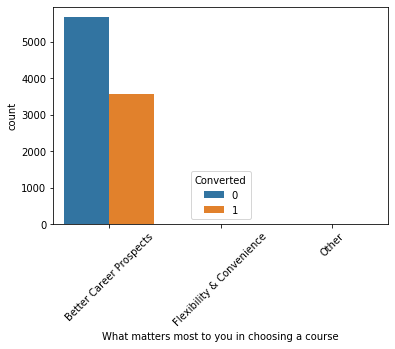

In [138]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data['What matters most to you in choosing a course'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [139]:
#checking value counts of variable
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [140]:
#Here again we can drop another Column  and Append to the cols_to_drop List
columns_to_drop.append('What matters most to you in choosing a course')
columns_to_drop

['Country', 'What matters most to you in choosing a course']

In [141]:
#checking value counts of Tag variable
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [142]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

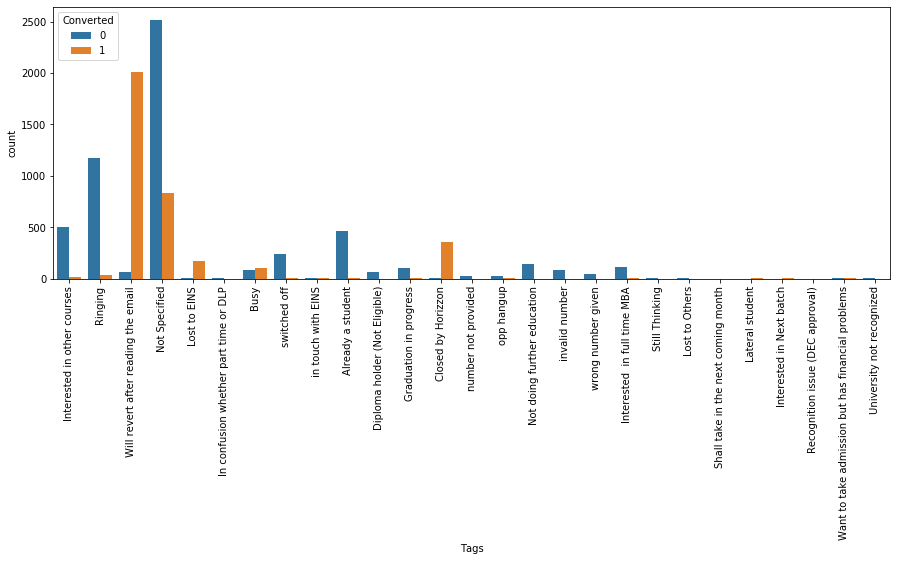

In [143]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(data['Tags'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [144]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [145]:
#checking percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [146]:
#checking value counts of Lead Source column
data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
testone                 1
NC_EDM                  1
WeLearn                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [147]:
#replacing Nan Values and combining low frequency values
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

-  grouped some of the lower frequency occuring labels under a common label 'Others'

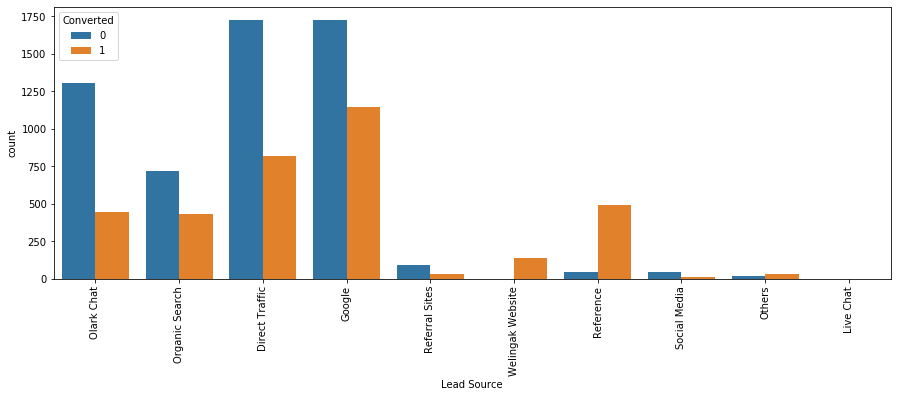

In [148]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data['Lead Source'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct     traffic, and google leads and generate more leads from reference and welingak website.

In [149]:
# Last Activity:

data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [150]:
#replacing Nan Values and combining low frequency values

data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [151]:
# Last Activity:

data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [152]:
#Check the Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [153]:
#Droping all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
data = data.dropna()

In [154]:
#Checking percentage of Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [155]:
#Lead Origin
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    3644
API                        2140
Lead Add Form               608
Lead Import                  28
Name: Lead Origin, dtype: int64

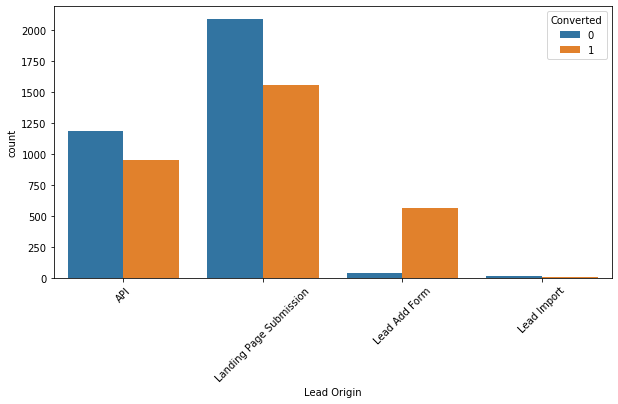

In [156]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(10,5))
s1=sns.countplot(data['Lead Origin'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

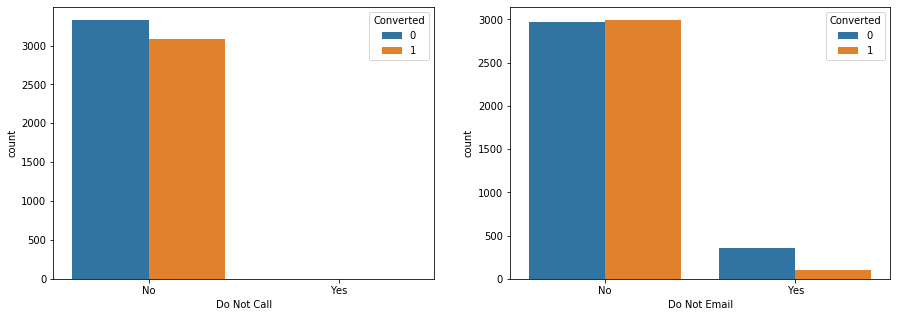

In [157]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(data['Do Not Call'], hue=data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels())

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(data['Do Not Email'], hue=data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels())
plt.show()

In [158]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts(dropna=False)

No     6418
Yes       2
Name: Do Not Call, dtype: int64

In [159]:
#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

No     5966
Yes     454
Name: Do Not Email, dtype: int64

In [160]:
columns_to_drop.append('Do Not Call')
columns_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [161]:
#IMBALANCED VARIABLES CAN BE DROPPED

In [162]:
data.Search.value_counts(dropna=False)

No     6410
Yes      10
Name: Search, dtype: int64

In [163]:
data.Magazine.value_counts(dropna=False)

No    6420
Name: Magazine, dtype: int64

In [164]:
data['Newspaper Article'].value_counts(dropna=False)

No     6419
Yes       1
Name: Newspaper Article, dtype: int64

In [165]:
data['X Education Forums'].value_counts(dropna=False)

No    6420
Name: X Education Forums, dtype: int64

In [166]:
data['Newspaper'].value_counts(dropna=False)

No     6419
Yes       1
Name: Newspaper, dtype: int64

In [167]:
data['Digital Advertisement'].value_counts(dropna=False)

No     6417
Yes       3
Name: Digital Advertisement, dtype: int64

In [168]:
data['Through Recommendations'].value_counts(dropna=False)

No     6414
Yes       6
Name: Through Recommendations, dtype: int64

In [169]:
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6420
Name: Receive More Updates About Our Courses, dtype: int64

In [170]:
data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6420
Name: Update me on Supply Chain Content, dtype: int64

In [171]:
data['Get updates on DM Content'].value_counts(dropna=False)

No    6420
Name: Get updates on DM Content, dtype: int64

In [172]:
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6420
Name: I agree to pay the amount through cheque, dtype: int64

In [173]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     4249
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [174]:
#adding imbalanced columns to list of columns to dropped

columns_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [175]:
#check value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Email Opened                    2042
Modified                        1966
SMS Sent                        1889
Page Visited on Website          214
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     50
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [176]:
#club lower frequency values

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

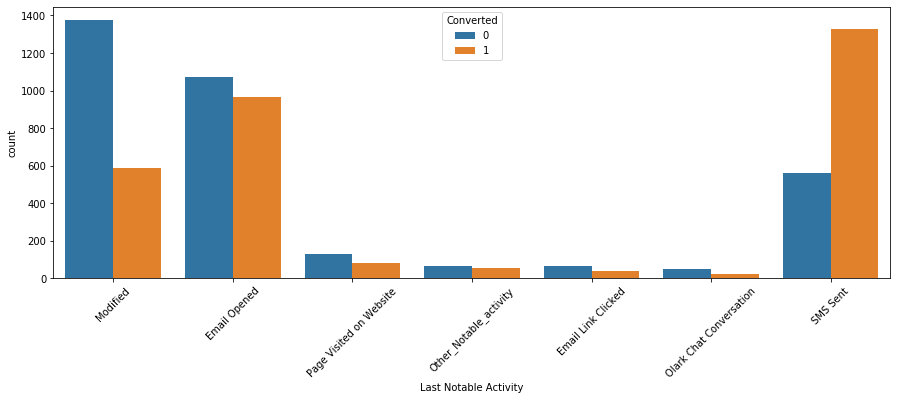

In [177]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
plt.show()

In [178]:
#check value counts for variable

data['Last Notable Activity'].value_counts()

Email Opened               2042
Modified                   1966
SMS Sent                   1889
Page Visited on Website     214
Other_Notable_activity      123
Email Link Clicked          110
Olark Chat Conversation      76
Name: Last Notable Activity, dtype: int64

In [179]:
#list of columns to be dropped
columns_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [180]:
#dropping columns
data = data.drop(columns_to_drop,1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6420 non-null   object 
 1   Lead Source                             6420 non-null   object 
 2   Do Not Email                            6420 non-null   object 
 3   Converted                               6420 non-null   int64  
 4   TotalVisits                             6420 non-null   float64
 5   Total Time Spent on Website             6420 non-null   int64  
 6   Page Views Per Visit                    6420 non-null   float64
 7   Last Activity                           6420 non-null   object 
 8   Specialization                          6420 non-null   object 
 9   What is your current occupation         6420 non-null   object 
 10  Tags                                    6420 non-null   obje

### Numerical Attributes Analysis

In [181]:
#Check the percentage of Data that has Converted Values = 1:

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

48.14641744548286

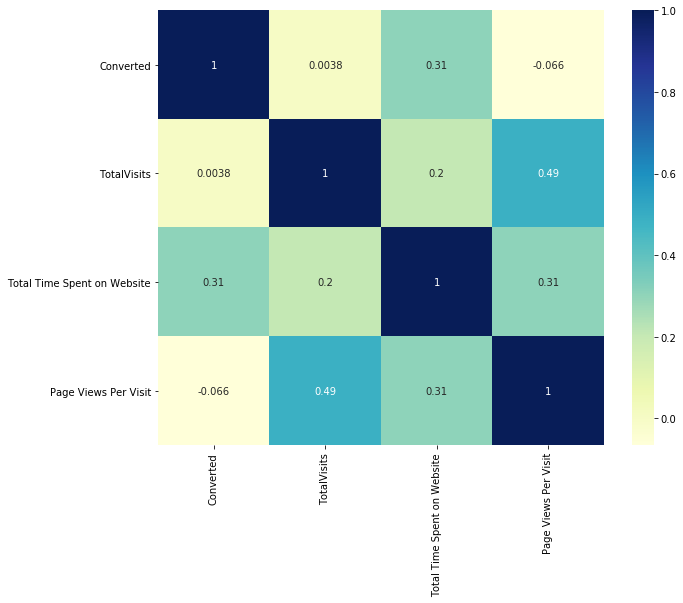

In [182]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

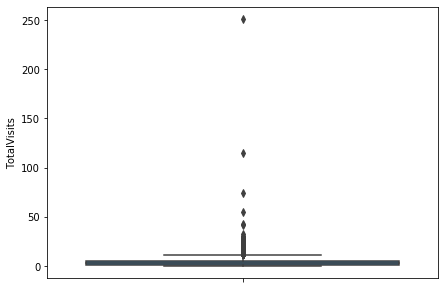

In [183]:
#visualizing spread of variable

plt.figure(figsize=(7,5))
sns.boxplot(y=data['TotalVisits'])
plt.show()

- we can see the outliers here at 250 

In [184]:
#checking percentile values for "Total Visits"

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6420.000000
mean        3.604050
std         5.037196
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.100000
95%        10.000000
99%        17.810000
max       251.000000
Name: TotalVisits, dtype: float64

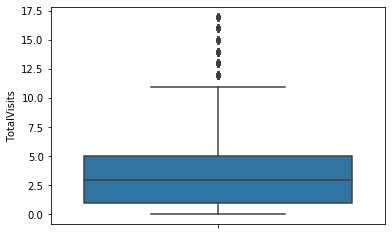

In [185]:
# Remove top & bottom 1% 

Q3 = data.TotalVisits.quantile(0.99)
data = data[(data.TotalVisits <= Q3)]
Q1 = data.TotalVisits.quantile(0.01)
data = data[(data.TotalVisits >= Q1)]
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [186]:
data.shape

(6355, 14)

In [187]:
#checking percentiles for "Total Time Spent on Website"

data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6355.000000
mean      531.110936
std       564.611735
min         0.000000
5%          0.000000
25%        30.000000
50%       282.000000
75%      1019.000000
90%      1424.000000
95%      1591.000000
99%      1847.920000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

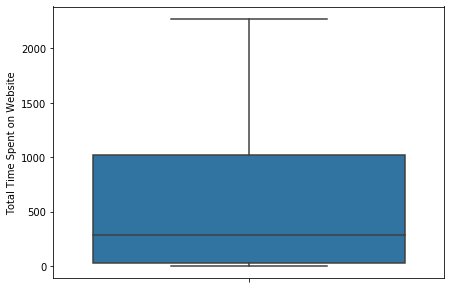

In [188]:
#visualizing spread of numeric variable

plt.figure(figsize=(7,5))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

- There are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

In [189]:
#checking spread of "Page Views Per Visit"

data['Page Views Per Visit'].describe()

count    6355.000000
mean        2.439520
std         2.045188
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        16.000000
Name: Page Views Per Visit, dtype: float64

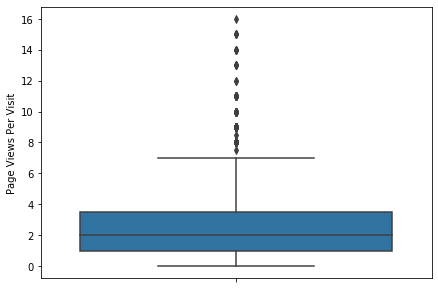

In [190]:
#visualizing spread of numeric variable

plt.figure(figsize=(7,5))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

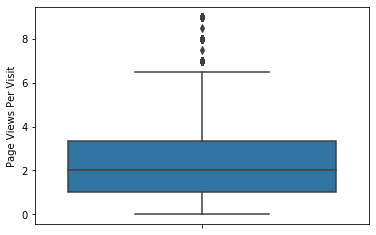

In [191]:
# Removing top & bottom 1% 

Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

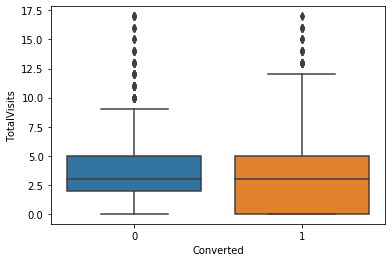

In [192]:
#check Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

#### Inference
- Median for converted and not converted 
- Nothng conclusive can be said on the basis of Total Visits

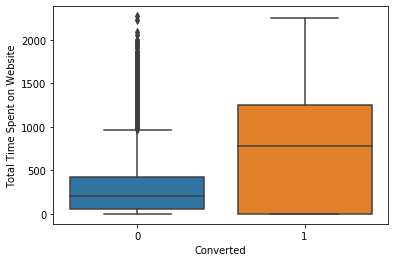

In [193]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=data.Converted, y=data['Total Time Spent on Website'])
plt.show()

#### Inference
- spending more time on the website are more likely to be converted.
- Website should be made more engaging to make  spend more time

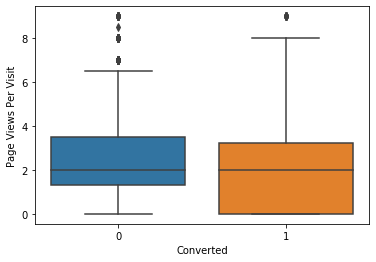

In [194]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=data.Converted,y=data['Page Views Per Visit'])
plt.show()

#### Inference
- Median for converted and unconverted  is the same.
- Nothing can be said specifically for conversion from Page Views

In [195]:
#checking missing values in leftover columns/

round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

##### Dummy Variable Creation

In [196]:
#getting  list of categorical columns

cate_cols= data.select_dtypes(include=['object']).columns
cate_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [197]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Apply the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [198]:
# get dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

In [199]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [200]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [201]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [202]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

In [203]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [204]:
#drop the original columns after dummy variable creation

data.drop(cate_cols,1,inplace = True)



In [205]:
data.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [206]:
# Train-Test Split & Logistic Regression Model Building

from sklearn.model_selection import train_test_split

# Putting response variable to y
y = data['Converted']

y.head()

X=data.drop('Converted', axis=1)

In [207]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [208]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4417 entries, 8582 to 8299
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4417 non-null   float64
 1   Total Time Spent on Website                           4417 non-null   int64  
 2   Page Views Per Visit                                  4417 non-null   float64
 3   Lead Origin_Landing Page Submission                   4417 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4417 non-null   uint8  
 5   Lead Origin_Lead Import                               4417 non-null   uint8  
 6   What is your current occupation_Housewife             4417 non-null   uint8  
 7   What is your current occupation_Other                 4417 non-null   uint8  
 8   What is your current occupation_Student               4

In [209]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8582,0.931209,0.069485,1.892332,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4387,-1.118534,-0.938455,-1.241445,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7577,-1.118534,-0.938455,-1.241445,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8879,-0.435286,0.351352,-0.196853,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9004,-1.118534,-0.938455,-1.241445,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [210]:
# Model Building using Stats Model & RFE
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [211]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [212]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('What is your current occupation_Housewife', False, 24),
 ('What is your current occupation_Other', False, 32),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 41),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Other Cities', False, 28),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 34),
 ('City_Thane & Outskirts', False, 30),
 ('City_Tier II Cities', False, 36),
 ('Specialization_Banking, Investment And Insurance', False, 13),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 33),
 ('Specialization_E-COMMERCE', False, 29),
 ('Specialization_International Business', Fal

In [213]:
#list of RFE supported columns
column = X_train.columns[rfe.support_]
column

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [214]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [215]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[column])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4417
Model:                            GLM   Df Residuals:                     4401
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -682.05
Date:                Mon, 08 Feb 2021   Deviance:                       1364.1
Time:                        11:43:35   Pearson chi2:                 5.56e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0198      0.260      0.076      0.939      -0.490       0.530
Total Time Spent on Website                  0.8546      0.078     10.952      0.000       0.702       1.008
Lead Origin_Lead Add Form                    1.2284      0.421      2.920      0.003       0.404       2.053
Lead Source_Welingak Website                 2.7504      1.107      2.485      0.013       0.582       4.919
Last Activity_Email Bounced                 -1.3462      0.508     -2.652      0.008      -2.341      -0.351
Last Activity_SMS Sent                       1.3596      0.362      3.756      0.000       0.650       2.069
Last Notable Activity_Email Opened           0.8165      0.277      2.951      0.003       0.274       1.359
Last Notable Activity_Modified              -0.8431      0.293     -2.879      0.004      -1.417      -0.269
Last Notable Activity_SMS Sent               0.8596      0.453      1.899      0.058      -0.028       1.747
Tags_Busy                                   -1.2999      0.258     -5.046      0.000      -1.805      -0.795
Tags_Closed by Horizzon                      4.5556      0.749      6.083      0.000       3.088       6.024
Tags_Interested in other courses            -3.7728      0.405     -9.313      0.000      -4.567      -2.979
Tags_Lost to EINS                            3.1753      0.553      5.744      0.000       2.092       4.259
Tags_Other_Tags                             -4.2589      0.250    -17.042      0.000      -4.749      -3.769
Tags_Ringing                                -4.8847      0.264    -18.481      0.000      -5.403      -4.367
Tags_Will revert after reading the email     2.5092      0.210     11.944      0.000       2.097       2.921
============================================================================================================
"""

-  p-value of variable data Source_Referral Sites is high, so we can drop it

In [216]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column].columns
vif['VIF'] = [variance_inflation_factor(X_train[column].values, i) for i in range(X_train[column].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,9.29
4,Last Activity_SMS Sent,8.38
6,Last Notable Activity_Modified,3.19
14,Tags_Will revert after reading the email,3.19
5,Last Notable Activity_Email Opened,2.72
12,Tags_Other_Tags,2.20
13,Tags_Ringing,2.08
1,Lead Origin_Lead Add Form,1.83
10,Tags_Interested in other courses,1.53
2,Lead Source_Welingak Website,1.40


- high correlation between two variables hence drop the variable with the higher valued VIF value 

In [218]:
#dropping variable with high VIF

column = column.drop('Last Notable Activity_SMS Sent',1)

In [219]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[column])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4417
Model:                            GLM   Df Residuals:                     4402
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -683.85
Date:                Mon, 08 Feb 2021   Deviance:                       1367.7
Time:                        11:46:19   Pearson chi2:                 5.59e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2595      0.228      1.140      0.254      -0.187       0.706
Total Time Spent on Website                  0.8493      0.078     10.940      0.000       0.697       1.001
Lead Origin_Lead Add Form                    1.2092      0.425      2.844      0.004       0.376       2.043
Lead Source_Welingak Website                 2.7355      1.107      2.471      0.013       0.566       4.905
Last Activity_Email Bounced                 -1.4037      0.506     -2.774      0.006      -2.395      -0.412
Last Activity_SMS Sent                       1.8910      0.233      8.131      0.000       1.435       2.347
Last Notable Activity_Email Opened           0.5676      0.244      2.329      0.020       0.090       1.045
Last Notable Activity_Modified              -1.1985      0.227     -5.278      0.000      -1.644      -0.753
Tags_Busy                                   -1.3119      0.255     -5.141      0.000      -1.812      -0.812
Tags_Closed by Horizzon                      4.6243      0.750      6.164      0.000       3.154       6.095
Tags_Interested in other courses            -3.7787      0.405     -9.328      0.000      -4.573      -2.985
Tags_Lost to EINS                            3.2163      0.556      5.780      0.000       2.126       4.307
Tags_Other_Tags                             -4.2437      0.248    -17.109      0.000      -4.730      -3.758
Tags_Ringing                                -4.8391      0.261    -18.565      0.000      -5.350      -4.328
Tags_Will revert after reading the email     2.5310      0.211     11.974      0.000       2.117       2.945
============================================================================================================
"""

In [220]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column].columns
vif['VIF'] = [variance_inflation_factor(X_train[column].values, i) for i in range(X_train[column].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Will revert after reading the email,2.83
5,Last Notable Activity_Email Opened,2.47
4,Last Activity_SMS Sent,2.45
6,Last Notable Activity_Modified,2.35
11,Tags_Other_Tags,2.00
12,Tags_Ringing,1.90
1,Lead Origin_Lead Add Form,1.82
9,Tags_Interested in other courses,1.42
2,Lead Source_Welingak Website,1.39
8,Tags_Closed by Horizzon,1.34


In [221]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8582    0.971861
4387    0.977474
7577    0.979856
8879    0.083931
9004    0.814619
130     0.983657
4       0.950668
659     0.928315
7042    0.279354
4725    0.005936
dtype: float64

In [222]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97186055, 0.97747355, 0.97985601, 0.08393123, 0.81461902,
       0.98365726, 0.95066816, 0.92831505, 0.27935416, 0.00593565])

In [223]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.971861,8582
1,1,0.977474,4387
2,1,0.979856,7577
3,0,0.083931,8879
4,1,0.814619,9004


In [224]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.971861,8582,1
1,1,0.977474,4387,1
2,1,0.979856,7577,1
3,0,0.083931,8879,0
4,1,0.814619,9004,1


In [225]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2130  147]
 [  91 2049]]


In [226]:
#checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9461172741679873


In [227]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0] 

In [228]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9574766355140187

In [229]:
# calculating specificity
TN / float(TN+FP)

0.9354413702239789

In [230]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06455862977602109


In [231]:
# positive predictive value 
print (TP / float(TP+FP))

0.9330601092896175


In [232]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9590274651058082


##### PLOTTING ROC CURVE

In [233]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [234]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

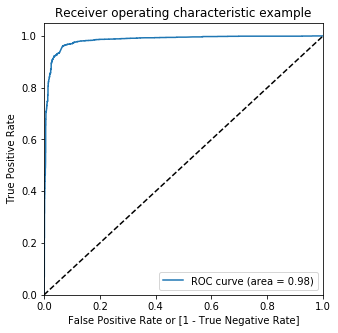

In [235]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

-  The ROC Curve should be close to 1. We are getting a good value of 0.97 indicating a good predictive model.

In [236]:
# Finding Optimal Cutoff Point
##Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that



In [237]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.971861,8582,1,1,1,1,1,1,1,1,1,1,1
1,1,0.977474,4387,1,1,1,1,1,1,1,1,1,1,1
2,1,0.979856,7577,1,1,1,1,1,1,1,1,1,1,1
3,0,0.083931,8879,0,1,0,0,0,0,0,0,0,0,0
4,1,0.814619,9004,1,1,1,1,1,1,1,1,1,1,0


In [238]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484492  1.000000  0.000000
0.1   0.1  0.909441  0.982243  0.841019
0.2   0.2  0.933665  0.971495  0.898112
0.3   0.3  0.942721  0.966355  0.920509
0.4   0.4  0.945664  0.960748  0.931489
0.5   0.5  0.946117  0.957477  0.935441
0.6   0.6  0.942042  0.925701  0.957400
0.7   0.7  0.940457  0.909813  0.969258
0.8   0.8  0.925741  0.872430  0.975845
0.9   0.9  0.905366  0.821028  0.984629


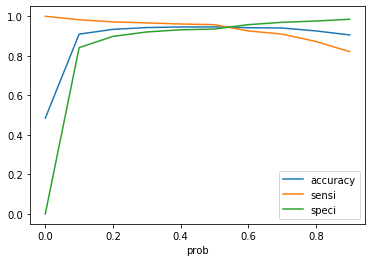

In [239]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

-  From the curve above, 0.3 is the optimum point to take it as a cutoff probability.



In [240]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.971861,8582,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.977474,4387,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.979856,7577,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.083931,8879,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.814619,9004,1,1,1,1,1,1,1,1,1,1,0,1


In [241]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.971861,8582,1,97
1,1,0.977474,4387,1,98
2,1,0.979856,7577,1,98
3,0,0.083931,8879,0,8
4,1,0.814619,9004,1,81


In [242]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9427213040525243

In [243]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2096,  181],
       [  72, 2068]], dtype=int64)

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [247]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9663551401869159

In [248]:
# Let us calculate specificity
TN / float(TN+FP)

0.9205094422485727

##### Observations:
 - So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

#Accuracy : 93.83%
#Sensitivity : 96.85%
#Specificity : 91.04%

In [249]:
# Calculate False Postive Rate
print(FP/ float(TN+FP))

0.07949055775142731


In [250]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9195197865718097


In [251]:
# Negative predictive value
print (TN / float(TN+ FN))

0.966789667896679


In [252]:
#Looking at the confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2096,  181],
       [  72, 2068]], dtype=int64)

In [253]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9195197865718097

In [255]:
 ## Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9663551401869159

In [256]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9195197865718097

In [257]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9663551401869159

In [258]:
from sklearn.metrics import precision_recall_curve

In [259]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

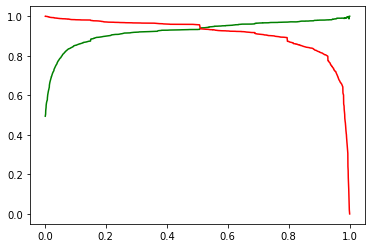

In [260]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [261]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
472,0.572821,1.242863,1.427078,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9132,4.653158,-0.728708,0.250553,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7689,-0.447264,-0.620629,-0.199454,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4239,2.272961,1.886107,0.521642,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
7592,-0.107235,1.811149,0.342723,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [262]:
X_test = X_test[column]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
472,1.242863,0,0,0,0,1,0,0,0,0,0,0,0,1
9132,-0.728708,0,0,0,0,0,0,0,0,0,0,0,1,0
7689,-0.620629,0,0,0,1,0,0,0,0,0,0,0,0,1
4239,1.886107,0,0,0,0,0,0,0,1,0,0,0,0,0
7592,1.811149,0,0,0,0,0,1,0,0,0,0,1,0,0


In [263]:
X_test_sm = sm.add_constant(X_test)

In [264]:
#PREDICTIONS ON TEST SET 
y_test_pred = res.predict(X_test_sm)

In [265]:
y_test_pred[:10]

472     0.988035
9132    0.005495
7689    0.984548
4239    0.998477
7592    0.025472
8085    0.980104
3902    0.006508
7870    0.593515
8628    0.055780
4020    0.044422
dtype: float64

In [266]:
# Converting y_pred to a dataframe which is  array
y_pred_1 = pd.DataFrame(y_test_pred)

In [267]:
# Head
y_pred_1.head()

,0
472,0.988035
9132,0.005495
7689,0.984548
4239,0.998477
7592,0.025472


In [268]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [269]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [270]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [271]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [272]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,472,0.988035
1,0,9132,0.005495
2,1,7689,0.984548
3,1,4239,0.998477
4,0,7592,0.025472


In [273]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [274]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,472,0.988035
1,0,9132,0.005495
2,1,7689,0.984548
3,1,4239,0.998477
4,0,7592,0.025472


In [275]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [276]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,472,1,0.988035,99
1,9132,0,0.005495,1
2,7689,1,0.984548,98
3,4239,1,0.998477,100
4,7592,0,0.025472,3


In [277]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [278]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,472,1,0.988035,99,1
1,9132,0,0.005495,1,0
2,7689,1,0.984548,98,1
3,4239,1,0.998477,100,1
4,7592,0,0.025472,3,0


In [279]:
# check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9503433703116746

In [280]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[931,  68],
       [ 26, 868]], dtype=int64)

In [281]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [282]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.970917225950783

In [283]:
# Let us calculate specificity
TN / float(TN+FP)

0.9319319319319319

In [284]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9273504273504274

In [285]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.970917225950783

#### Observation:
##### After running the model on the Test Data these are the figures we obtain:

- Accuracy : 95.53%
- Sensitivity : 96.67%
- Specificity : 90.60%